# <span style="color:#0b486b">SIT 112 - Data Science Concepts - Assignment 1</span>

---
Lecturer: Sergiy Shelyag | sergiy.shelyag@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC 3215, Australia.

### <span style="color:#0b486b">Due: 8pm, Friday 16th April 2021</span>

---

### <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete Assignment 1. Some sections have been pre-filled  to help you get started. **The total mark for this programming task is 65**.

1. Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Assignment1_instructions.pdf*  to know what else you need to complete for this assignment.
2. For each cell marked with *#INSERT YOUR CODE HERE*, you must write your own code in this cell.
3. For each cell marked with *#INSERT YOUR COMMENT HERE*, you must write your own explanatory comment in this cell.
4. At the end, you must run the entire notebook and submit two files:
 1. The source of your solution notebook: [YourID]_assignment1_solution.ipynb
 2. And an exported version of your output: [YourID]_assignment1_output.html  
       
For example, if your student ID is 123456, then you need submit two files:

1. **123456_assignment1_solution.ipynb**
2. and **123456_assignment1_output.html**

As you go through this notebook:

* markdown cells marked with **Note** mean description sections.
* markdown cells marked with **Instructions** mean the instructions given to you to complete the sections.

***If an instruction is not clear, please contact the unit chair or the teaching team as soon as possible.***


In [110]:
#
# Import packages needed for processing
#
import numpy as np   # import the numpy package
import csv           # this package needed for processing csv file
from collections import Counter  # this is for dictionary construction with counting functionality
import matplotlib.pyplot as plt  # this is for plotting and other descriptive statistics
import datetime      # this package is for handling time
#
# If you need add any additional packages, then add them below this line
#
import statistics # for stasticcal analysis


**Note**: you must place your data file in the same folder with your python notebook.

In [111]:
# Declare the path to the data file
DATA_FILE = "owid-covid-data.csv"

**Note**. The following segment of codes is to load the data from the .csv file using csv package. It has been provided for you to get started. Please **do not** change this piece of code as well the variable names as we will need these variables to complete subsequent tasks. 

In [112]:
# Load CSV file using DictReader
input_file = csv.DictReader(open(DATA_FILE))
fieldnames = input_file.fieldnames
data_dict = {fn: [] for fn in fieldnames}
print(data_dict.keys())
for line in input_file:
    for k, v in line.items():
        if (v == ''): #quick fix for missing values
            v=0
        try:
            data_dict[k].append(int(v))
        except ValueError:
            try:
                data_dict[k].append(float(v))
            except ValueError:
                data_dict[k].append(v)
                
for k, v in data_dict.items():
    data_dict[k] = np.array(v)

dict_keys(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinatio

---
## **Instruction 1**
We first examine the variables and the overall data size. The tasks:

1. Write your code to print the type for the following variables (**4 marks**):
    * input_file
    * data_dict
    * data_dict['iso_code']
    * data_dict['reproduction_rate']


2. Write your code to print out the number of data records (**1 mark**):

[**Total mark: 5**]

In [113]:
# INSERT YOUR CODE HERE
#
#1. Write you code to print the type for the following variables:
#    * input_file
#    * data_dict
#    * data_dict['iso_code']
#    * data_dict['reproduction_rate']
#
print("The type of input_file is ",type(input_file))
print("The type of data_dict is ",type(data_dict))
print("The type of data_dict['iso_code'] is ",type(data_dict['iso_code']))
print("The type of data_dict['reproduction_rate'] is ", type(data_dict['reproduction_rate']))


The type of input_file is  <class 'csv.DictReader'>
The type of data_dict is  <class 'dict'>
The type of data_dict['iso_code'] is  <class 'numpy.ndarray'>
The type of data_dict['reproduction_rate'] is  <class 'numpy.ndarray'>


In [114]:
# INSERT YOUR CODE HERE
# NOTE that the output number is one less than the value that Excel shows at the bottom of the data sheet. I realised this is
# because they count the top header part as a show so my output is correct
# 2. Write your code to print out the number of data records
#
record_count = 0;
for item in data_dict['iso_code']:
    record_count = record_count + 1
print(record_count,"records")


77954 records


---
## Instruction 2
The following code segment is designed to calculate some basic statistics from the data for a recent date. The data is stored in **data_filtered_by_date** dictionary.

**Your task:**
1. Learn how the code, which extracts the data for all countries at a required date, works. Why **try-except** construction is required in this code? Provide the answer. (**2 marks**)
1. Write your code to find and print the minimum and the maximum values of mortality per million in the **total_deaths_per_million** column. (**1 mark**)
2. Write your code to find and print the minimum and the maximum values of cases per million in the **total_cases_per_million** column. (**1 mark**)
3. Write your code to find and print the mean and median mortality per million, and the standard deviation from the **total_deaths_per_million** column. (**2 marks**)
4. Write your code to construct a box plot for the **total_deaths_per_million**. (**2 marks**) 
4. You will find that mean and median values for mortality are quite different. Briefly describe the meaning of the difference between the mean and median mortality per million. Why are they different? (**2 marks**)

**[Total mark: 10]**

In [115]:
# THIS PART EXTRACTS THE DATA FOR ALL COUNTRIES AT A REQUIRED DATE.
# LEARN HOW IT WORKS.
# data_filtered_by_date DICTIONARY CONTAINS ALL DATA FOR ALL COUNTRIES AT required_date

required_date = '2021-03-09'

index_for_date = (data_dict['date'] == required_date)
data_filtered_by_date = {}
for key in data_dict.keys():
    try:
        data_filtered_by_date[key] = np.float_(data_dict[key][index_for_date])
    except:
        data_filtered_by_date[key] = data_dict[key][index_for_date]

In [116]:
# 1. Why **try-except** construction is required in this code? (2 marks)
# INSERT YOUR ANSWER HERE
# Because some values cannot be converted to floats such as country codes. So as you iterate through the data set the values
# that can be converted to floats are, and if they cannot not then they are stored as strings, or whatever tyoe they originally were.
# If i remove the try except construction i receive an error. 'ValueError: could not convert string to float: AFG'. So instead
# of throwing an error we just store the value in the new dictionary as a string.

In [117]:
# INSERT YOUR CODE HERE
#
# 2. Write your code to find and print the minimum and the maximum values of mortality 
#    per million (key name 'total_deaths_per_million'). (1 mark)
#
#
min_death = 0
max_death = 0
x = 0
for item in data_filtered_by_date['total_deaths_per_million']:
    if (x == 0 and item > 0):
        min_death = item
        max_death = item
        x = 1
    if (item < min_death and item > 0):
        min_death = item
    if (item > max_death and item > 0):
        max_death = item
        
print("The minimum value of deaths per million is ", min_death)
print("The maximum value of deaths per million is ", max_death)


The minimum value of deaths per million is  0.252
The maximum value of deaths per million is  2268.843


In [118]:
# INSERT YOUR CODE HERE
#
# 3. Write your code to find and print the minimum and the maximum values of cases per million 
# in the total_cases_per_million column. (1 mark)
#
min_cases = 0
max_cases = 0
x = 0
debug = 0
for item in data_filtered_by_date['total_cases_per_million']:
    if (x == 0 and item > 1):
        min_cases = item
        max_cases = item
        debug += 1
        x = 1
    if (item < min_cases and item > 1):
        min_cases = item
    if (item > max_cases and item > 1):
        max_cases = item
        
print("The minimum value of cases per million is ", min_cases)
print("The maximum value of cases per million is ", max_cases)
print(debug)

The minimum value of cases per million is  6.46
The maximum value of cases per million is  143519.058
1


In [119]:
# INSERT YOUR CODE HERE
# Write your code to find and print the mean and median mortality per million, and the standard 
# deviation from the total_deaths_per_million column. (2 marks)
mean = statistics.mean(data_filtered_by_date['total_deaths_per_million'])
print("Mean mortality rate per million of ", mean)
median = statistics.median(data_filtered_by_date['total_deaths_per_million'])
print("Median mortality rate per million of ", median)
std = np.std(data_filtered_by_date['total_deaths_per_million'])
print("Standard deviation is ", std)

Mean mortality rate per million of  413.4000422535211
Median mortality rate per million of  114.538
Standard deviation is  550.0176495305499


<function matplotlib.pyplot.show(close=None, block=None)>

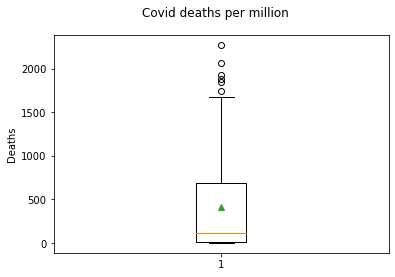

In [120]:
# INSERT YOUR CODE HERE
#
# Write your code to construct a box plot for the COVID mortality per million.
# The date is very skewed. This shows how the median of 20 is far away from the majority of deaths.
plt.boxplot(data_filtered_by_date['total_deaths_per_million'], showmeans=True)
plt.suptitle('Covid deaths per million')
plt.ylabel('Deaths')
plt.show

In [121]:
#### INSERT YOUR COMMENT HERE
#
# Briefly describe the meaning of the difference between the mean and median COVID mortality per million.
# Why are they different? (2 marks)
# The median is the data set split in half. Half of the countries have a mortality per million of less than 114.
# The mean is much higher at 413 deaths per million because it is skewed heavily by countries with very high death rates 
# like the UK or USA. This is also why the standard deviation is very high, this indicates the data is heavily skewed and
# we need to account for it when analysing the data. 



---
## **Instruction 3**
This part of the assignment is designed to examine COVID cases and mortality data for different countries. The countries are given by their ISO alpha-3 codes, given here: https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3 .
As in the previous task, we will be using **total_cases_per_million** and **total_deaths_per_million** columns.

**Your tasks**:

1. Write your code to find and print out the number of countries in the dataset. (**1 mark**)
2. Population mortality from seasonal influenza is generally thought to be about 0.01% (1 death per 10000 people). Write your code to find and print out the list of countries with the population mortality greater than ten times of the population mortality of seasonal influenza. (**2 marks**)
3. Write your code to find and print out the country with the highest population mortality. Both the country code and the mortality value for this country need to be printed out (**2 marks**)
4. Write your code to construct a dictionary variable ***data_large_countries*** whose keys are **iso_code**, **total_cases_per_million**, **total_deaths_per_million**, **population**, **population_density**. You can start from the original dataset **data_dict**. You can adapt the code given to you in Instruction 2. Print the dictionary. (**2 marks**)
5. Using the new dictionary ***data_large_countries***, plot a bar chart of mortality sorted in descending order of values for the countries with **population** more than 1 million, achieving first twenty places of leadership in exterminating their own population. (**3 marks**)
6. Using the same dictionary, plot a bar chart of population density for the mortality leaders. Use the same order of countries as in Task 5. (**3 marks**)
7. Discuss the bar charts. Which conclusion you can draw, if you look at all of them together? (**2 marks**)

[**Total mark: 15**]

In [122]:
# INSERT YOUR CODE HERE 
# Write your code to find and print out the number of countries in the dataset. (1 mark)
# To be sure that you get a list of unique countries, you may want to use np.unique
unique_countries_list = np.unique(data_dict['iso_code'])
count = 0
for item in unique_countries_list:
    count += 1
print(unique_countries_list)
print(count, 'unique countries')


['AFG' 'AGO' 'AIA' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'AZE'
 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BMU'
 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV'
 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CYM' 'CYP' 'CZE' 'DEU'
 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH' 'FIN'
 'FJI' 'FLK' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GGY' 'GHA' 'GIB' 'GIN'
 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUY' 'HKG' 'HND' 'HRV' 'HTI'
 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JEY'
 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR'
 'LBY' 'LCA' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MCO' 'MDA'
 'MDG' 'MDV' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT'
 'MSR' 'MUS' 'MWI' 'MYS' 'NAM' 'NER' 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NZL'
 'OMN' 'OWID_AFR' 'OWID_ASI' 'OWID_CYN' 'OWID_EUN' 'OWID_EUR' 'OWID_INT'
 'OWID_KOS' 'OWID_NAM' 'OWID_OCE' 'OWID_SAM' 'OWID_

In [123]:
# INSERT YOUR CODE HERE 
#
# 2. Population mortality from seasonal influenza is generally thought to be about 0.01% 
# (1 death per 10000 people). Write your code to find and print out the list of countries 
# with the population mortality is more than ten times of the seasonal influenza. (2 marks)
# Since influenca death rate is 1 per 10,000. Adjusting this to millions = 100 deaths per million. 
# We can use this adjusted rate to find countries with rates 10 times higher than that.
# will use || count if deaths > 1000 per million.

#Used to find the last index of every country
indexList = {"iso_code" : "index"}
indexList["iso_code"] = []
indexList["index"] = []

#used to created the final dictoionary that has the countrys with deaths per million of 1000 or more
finalCountryDict = {'iso_code' : 'total_deaths_per_million'}
finalCountryDict['iso_code'] = []
finalCountryDict['total_deaths_per_million'] = []
countryAtm = ""

# Cycles through entire country list and returns every country along with the last index in which they appear
for index, coun in enumerate(data_dict["iso_code"]):
    if (index == 0):
        countryAtm = coun
    if (countryAtm != coun):
        indexList["iso_code"].append(data_dict["iso_code"][index - 1])
        indexList["index"].append(index - 1)
        try:
            countryAtm = data_dict["iso_code"][index + 1]
        except: 
            countryAtm = "Done"

# Sorts through the created index list and uses it to sort through the data_dict total deaths per million and if deaths are greater
# than 1000 the country and death count is added to a list 
for i, idx in enumerate(indexList["index"]):
    if (data_dict["total_deaths_per_million"][indexList["index"][i]] > 1000):
        finalCountryDict['iso_code'].append(data_dict["iso_code"][indexList["index"][i]])
        finalCountryDict['total_deaths_per_million'].append(data_dict["total_deaths_per_million"][indexList["index"][i]])
for x in range(0, 40):
    print(finalCountryDict['iso_code'][x], "has a death rate of", finalCountryDict['total_deaths_per_million'][x], "deaths per million")   

AND has a death rate of 1488.384 deaths per million
ARG has a death rate of 1226.862 deaths per million
ARM has a death rate of 1168.993 deaths per million
AUT has a death rate of 1027.714 deaths per million
BEL has a death rate of 1975.648 deaths per million
BOL has a death rate of 1043.945 deaths per million
BIH has a death rate of 1895.87 deaths per million
BRA has a death rate of 1468.794 deaths per million
BGR has a death rate of 1829.186 deaths per million
CHL has a death rate of 1190.299 deaths per million
COL has a death rate of 1237.253 deaths per million
HRV has a death rate of 1435.473 deaths per million
CZE has a death rate of 2416.103 deaths per million
OWID_EUR has a death rate of 1207.807 deaths per million
OWID_EUN has a death rate of 1368.941 deaths per million
FRA has a death rate of 1390.421 deaths per million
HUN has a death rate of 2067.42 deaths per million
ITA has a death rate of 1785.143 deaths per million
LIE has a death rate of 1468.39 deaths per million
LTU h

In [124]:
# INSERT YOUR CODE HERE 
# Write your code to find and print out the country with the highest population mortality. 
# Both the country code and the mortality value for this country need to be printed out (2 marks)
# HINT: You can use np.where or np.argmax functions.

max_deaths = 0
x = 0
indexX = 0
for index, item in enumerate(data_dict['total_deaths_per_million']):
    if (x == 0 and item > 1):
        max_deaths = item
        x = 1
    if (item > max_deaths and item > 1):
        max_deaths = item
        indexX = index
print(data_dict['iso_code'][indexX], "had the greatest population mortality per million of ", max_deaths)
print("Its worth noting that ", data_dict['iso_code'][indexX], " has a small population of ", data_dict['population'][indexX])

SMR had the greatest population mortality per million of  2475.102
Its worth noting that  SMR  has a small population of  33938.0


In [125]:
# INSERT YOUR CODE HERE 
# 4. Write your code to construct a dictionary variable ***data_large_countries*** whose keys are **iso_code**,
# **total_cases_per_million**, **total_deaths_per_million**, **population**, **population_density**.
# You can start from the original dataset **data_dict**.
# You can adapt the code given to you in Instruction 2.
# Print the dictionary.
# (**2 marks**)

#I addapted the code from Instruction 2 by simply assigning the values in each key to the values in the same key in data_dict
#but with the indexs of index_for_date

data_large_countries = {}
attribList = ['iso_code', 'total_cases_per_million', 'total_deaths_per_million', 'population', 'population_density']
for item in attribList:
    data_large_countries[item] = data_dict[item][index_for_date]
popCheck = np.array(data_large_countries['population'])
for key in data_large_countries.keys():
    if (key == attribList[0]):
        print("data_large_countries dictionary")
    print("key:", key)

data_large_countries dictionary
key: iso_code
key: total_cases_per_million
key: total_deaths_per_million
key: population
key: population_density


20 20


<function matplotlib.pyplot.show(close=None, block=None)>

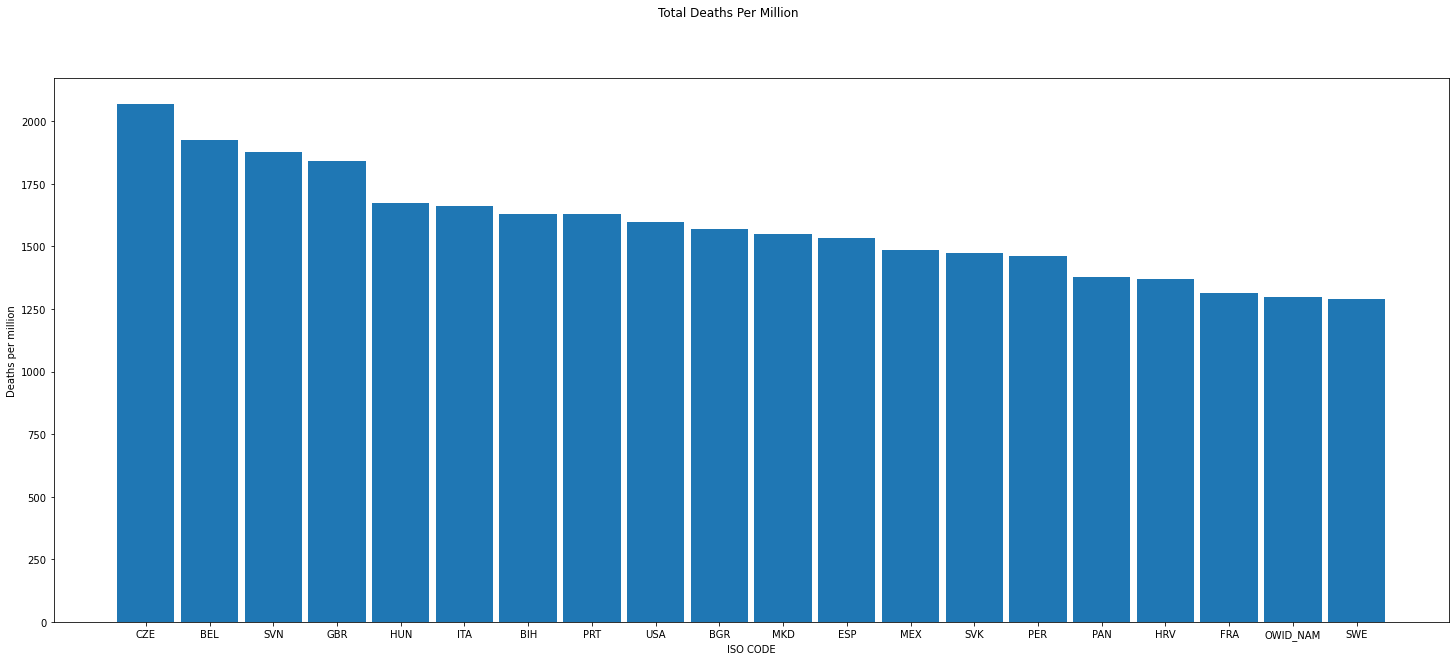

In [126]:
# INSERT YOUR CODE HERE 
# 5. Using the new dictionary ***data_large_countries***, plot a bar chart of mortality
# sorted in descending order of values for the countries with **population** more than 1 million, 
# achieving first twenty places in exterminating their own population. (**3 marks**)
#
# HINT: You can use np.argsort.
newListIndex = []
sortedList = []
sortednameList = []
rsltNamesTop20 = []
rsltDeathsTop20 = []
newListIndex = np.argsort(data_large_countries['total_deaths_per_million'])
sortedList = data_large_countries['total_deaths_per_million'][newListIndex]
sortednameList = data_large_countries['iso_code'][newListIndex]
sortedPopList = data_large_countries['population'][newListIndex]
rsltPop = sortedPopList[::-1]
rsltNames = sortednameList[::-1]
rsltDeaths = sortedList[::-1]
x = 0
pop = 0
while (x < len(rsltDeaths)):
    if (rsltPop[x] > 1000000 and pop <20):
        rsltDeathsTop20.append(rsltDeaths[x])
        rsltNamesTop20.append(rsltNames[x])
        pop += 1
        x += 1
    else:
        x += 1
print(len(rsltDeathsTop20), len(rsltNamesTop20))
plt.figure(figsize = (25,10))
plt.bar(rsltNamesTop20, rsltDeathsTop20, width = 0.9, align='center')
plt.suptitle("Total Deaths Per Million")
plt.ylabel("Deaths per million")
plt.xlabel("ISO CODE")
plt.show


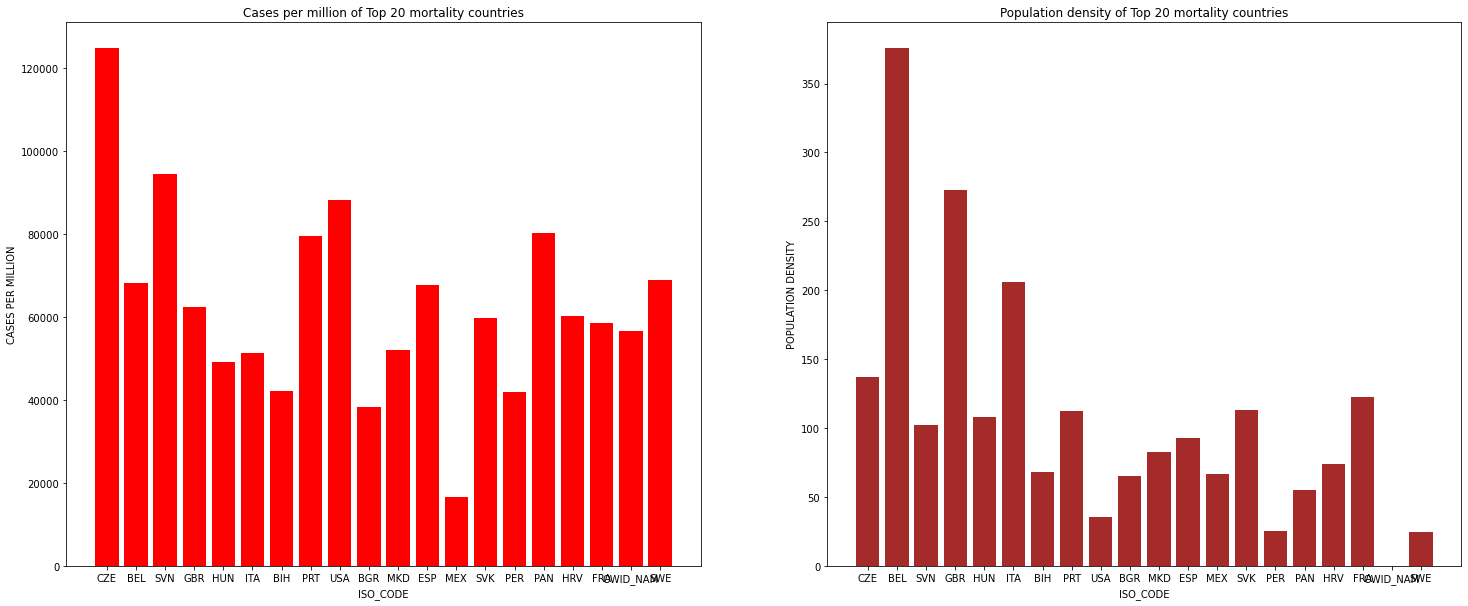

In [127]:
# INSERT YOUR CODE HERE 
# 6. Using the same dictionary, plot a bar chart of total cases and population density for the mortality leaders.
# Use the same order of countries as in Task 5. (**3 marks**)
#
# HINT: you want to plot these side by side.
sortedCasesList = []
sortedDensityList = []
rsltCasesTop20 = []
rsltDensTop20 = []
rsltNamesTop20 = []
rlstPopTop20 = []
sortedCasesList = data_large_countries['total_cases_per_million'][newListIndex]
sortedDensityList = data_large_countries['population_density'][newListIndex]
sortedNamesList = data_large_countries['iso_code'][newListIndex]
rsltCases = sortedCasesList[::-1]
rsltDens = sortedDensityList[::-1]
rsltNames = sortedNamesList[::-1]
# FILTERING OUT THE REST OF THE COUNTRIES
x = 0
pop = 0
while (x < len(rsltDeaths)):
    if (rsltPop[x] > 1000000 and pop <20):
        rsltNamesTop20.append(rsltNames[x])
        rsltCasesTop20.append(rsltCases[x])
        rsltDensTop20.append(rsltDens[x])
        pop += 1
        x += 1
    else:
        x += 1
         

###################################################################
# PLOTTING THE GRAPHS
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,10))
ax1.bar(rsltNamesTop20, rsltCasesTop20,color='r',label='Cases')
ax1.set_xlabel('ISO_CODE')
ax1.set_ylabel('CASES PER MILLION')
ax1.title.set_text('Cases per million of Top 20 mortality countries')

ax2.bar(rsltNamesTop20, rsltDensTop20,color='brown',label='Density')
ax2.set_xlabel('ISO_CODE')
ax2.set_ylabel('POPULATION DENSITY')
ax2.title.set_text('Population density of Top 20 mortality countries')

plt.show()


In [128]:
# 7. Discuss the bar charts. Which conclusion you can draw, if you look at all of them together? (**2 marks**)
# INSERT YOUR COMMENT HERE
# The top 20 countries for deaths per million seem to have similar mortality rates. There is not one true outlier for large
# countries. This indicates that all these countries have had similarly bad outbreaks when adjusted for population. Then 
# when we take this list of top 20 countries and plot the cases per million and population density we can see that population
# density has weak or no causation of mortality. We can also see on Cases Per Million the countries that have missed alot of
# cases like Mexico. We would expect that case rates would line up similarly to death rates if no cases were missed.  



---
## **Instruction 4**
Let's now look at the other end of the COVID spread - at the countries with large populations (more than 1 million) and with the minimal number of cases and deaths. We can use the same dataset ***data_large_countries*** we have prepared in the previous task.

**Your tasks here are:**
1. Using the new dictionary ***data_large_countries***, plot bar charts of mortality per million, cases per million and population density for the 20 countries with **population** more than 1 million and minimal mortality. (**3 marks**)
2. In the bar charts you have got you should see a very clear exception. Describe its properties. What makes it exceptional? (**2 marks**)

[**Total mark: 5**]

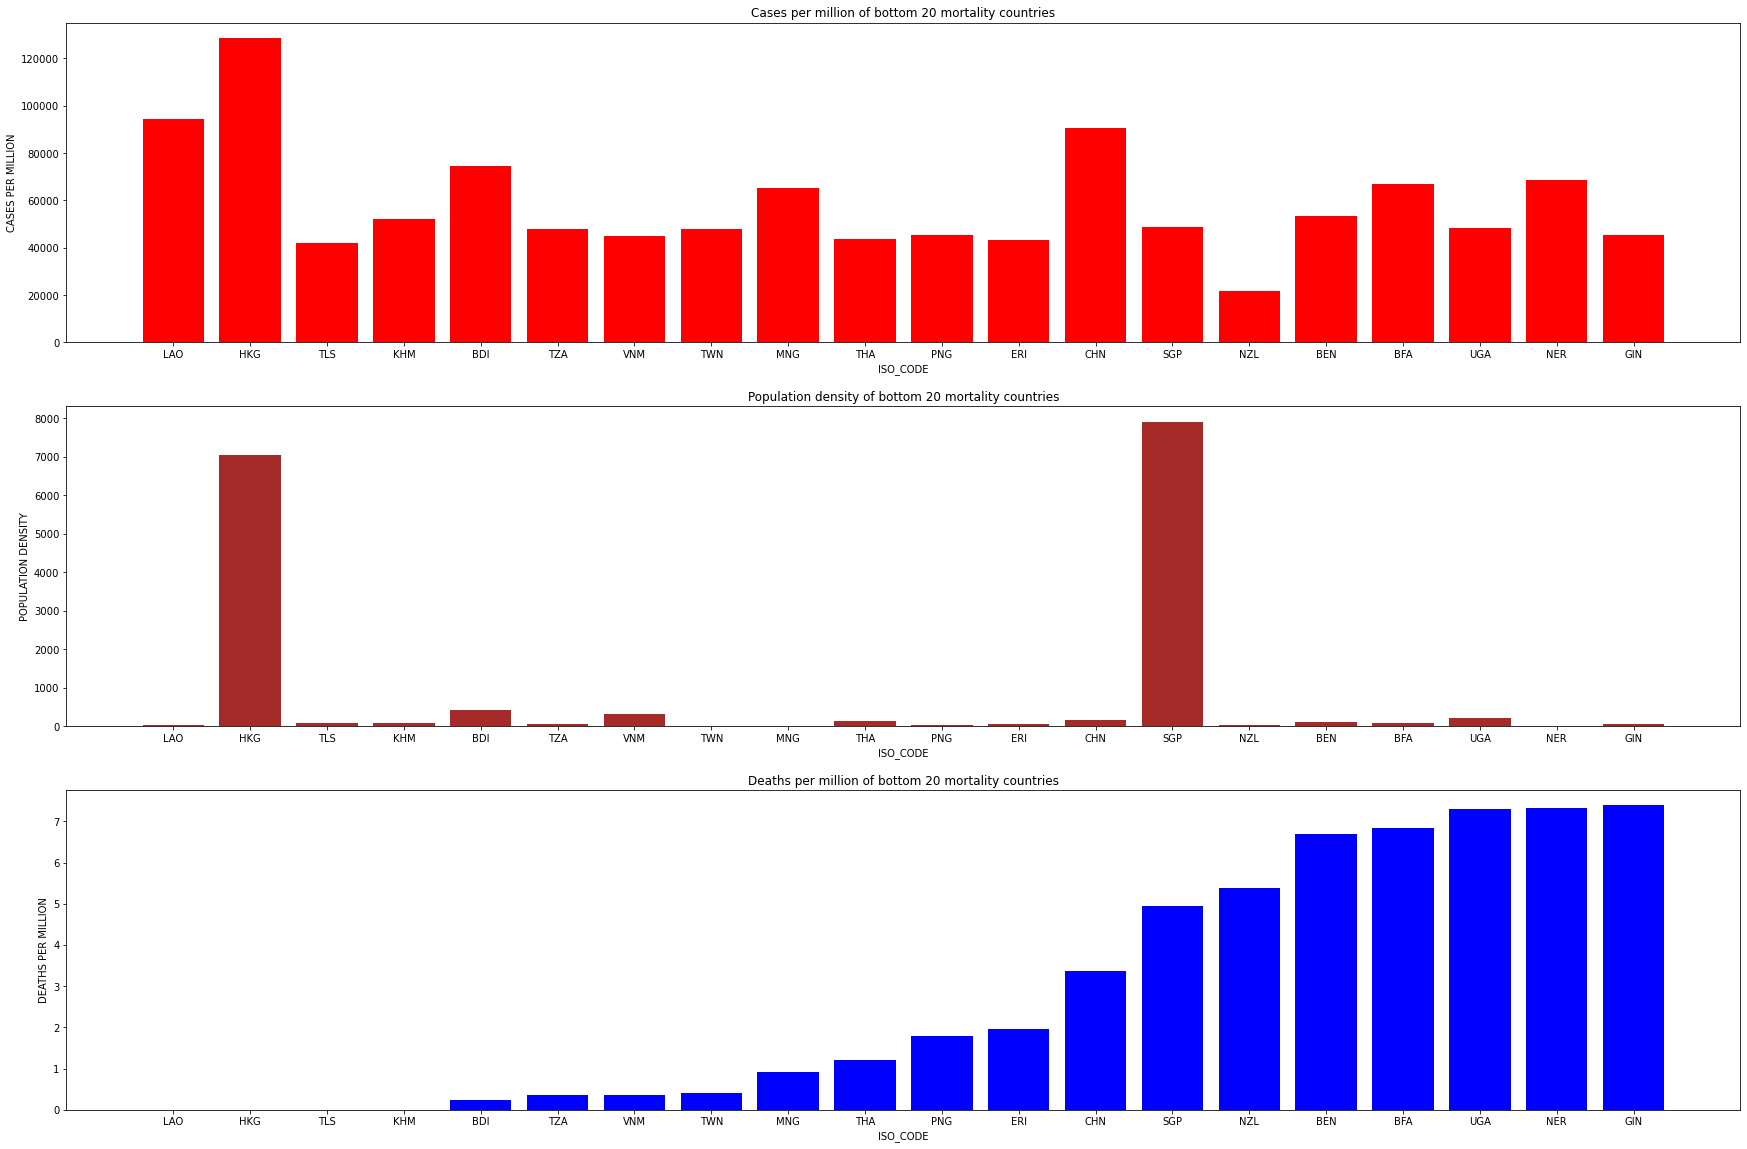

In [129]:
# 1. Using the new dictionary ***data_large_countries***, plot bar charts of mortality per million, 
# cases per million and population density for the 20 countries with **population** more than 1 
# million and minimal mortality. (**3 marks**)
#INSERT YOUR CODE HERE
#This is the same code as instruction 3 q5. 
import matplotlib.gridspec as gridspec
rsltDeathsTop20 = []
rsltNamesTop20 = []
rsltCasesTop20 = []
rsltDensTop20 = []
sortedList = data_large_countries['total_deaths_per_million'][newListIndex]
sortedNamesList = data_large_countries['iso_code'][newListIndex]
sortedCasesList = data_large_countries['total_cases_per_million'][newListIndex]
sortedDensityList = data_large_countries['population_density'][newListIndex]
rsltPop = sortedPopList
rsltNames = sortednameList
rsltDeaths = sortedList
rsltDens = sortedDensityList
rlstCases = sortedCasesList
x = 0
pop = 0
while (x < len(rsltDeaths)):
    if (rsltPop[x] > 1000000 and pop <20):
        rsltNamesTop20.append(rsltNames[x])
        rsltCasesTop20.append(rsltCases[x])
        rsltDensTop20.append(rsltDens[x])
        rsltDeathsTop20.append(rsltDeaths[x])
        pop += 1
        x += 1
    else:
        x += 1

###################################################################
# PLOTTING THE GRAPHS

gs = gridspec.GridSpec(3, 1)
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1.bar(rsltNamesTop20, rsltCasesTop20,color='r',label='Cases')
ax1.set_xlabel('ISO_CODE')
ax1.set_ylabel('CASES PER MILLION')
ax1.title.set_text('Cases per million of bottom 20 mortality countries')

ax2 = fig.add_subplot(gs[1, 0])# row 0, col 1
ax2.bar(rsltNamesTop20, rsltDensTop20,color='brown',label='Density')
ax2.set_xlabel('ISO_CODE')
ax2.set_ylabel('POPULATION DENSITY')
ax2.title.set_text('Population density of bottom 20 mortality countries')

ax3 = fig.add_subplot(gs[2 :]) # row 1, span all columns
ax3.bar(rsltNamesTop20, rsltDeathsTop20,color='blue',label='Deaths')
ax3.set_xlabel('ISO_CODE')
ax3.set_ylabel('DEATHS PER MILLION')
ax3.title.set_text('Deaths per million of bottom 20 mortality countries')

In [130]:
# 2. In the bar charts you have got you should see a very clear exception. Describe its properties. 
# What makes it exceptional? (**2 marks**)
# INSERT YOUR COMMENT HERE
#The clear exception in the bar charts are the countrys of Singapore and Hong Kong. Both of these countries are extremely 
#population dense but have managed to keep population mortality very low. Hong Kong is also special given that it has a large 
#number of cases compared to the other countries but it's deaths remain very low. I believe this is because whilst Honk Kong 
#has been succesful in controlling COVID-19, it's population is relatively young especially compared to high mortality countries
#such as Italy with older populations
#We can deduce that population density has no correlation on total cases per million

---
## **Instruction 5 (D/HD level)**

We will return back to the differences between the countries in their ways of dealinig with epidemics in Instruction 6. Now, however, we shall look at the basics of epidemiological processes from the point of view
of real data. Generally, epidemics evolve exponentially until they are either stopped by some measures (lockdowns, vaccinations) or saturate (population dies out and/or gets naturally immune).

**Your tasks**:

1. Define a function called **convert_date** that takes date string (in the format as it is given in the dataset csv file) as the input and returns the number of days from that date until now. The number should be negative. For example, today is 14/3/21. The input date is 3/3/21. The function should compute the difference between the input date and today's date and return -13. If the function argument is in incorrect form, the function should return 0. Don't forget to test it. (**4 marks**)
2. Pick three countries, which may be interesting or relevant for you. For me they are the UK, Ukraine and Australia (iso codes GBR, UKR, AUS). For demonstration purpose you want to include Australia or another country, which was able to deal with the COVID epidemics more or less successfully, and a country with large number of cases. Make a new list **country_list**, which contains iso codes of the countries. (**1 mark**)
3. Plot how **total_cases** for the countries you have picked, grow in time. All three curves have to be on the same plot with the horizontal axis of "Number of days before today". Don't forget the legend. (**4 marks**)
4. If you have chosen the countries appropriately, you will see that the plot you have produced is not very informative. Why is it so? What can you do to make it more informative and to reveal the true dynamics? Note there are **two** reasons, you need to provide both. (**1 mark**)
5. Implement the idea from Task 4 and make a plot, similar to task 3. (**1 mark**)
6. Explain what you see in the new plot. Do you see specific regions of interest in the epidemic curves? Discuss them. (**4 marks**)

[**Total mark: 15**]


NB: There are many more interesting dependencies you can produce in this part, and you are welcome to do so. Also, if you implement everything correctly, you don't need to limit yourself to three countries only.

In [131]:
# 1. Define a function called **convert_date** that takes date string (in the format as it is given 
# in the dataset csv file) as the input and returns the number of days from that date until now. The 
# number should be negative. For example, today is 14/3/21. The input date is 3/3/21. The function 
# should return -13. If the function argument is in incorrect form, the function should return 0. 
# (**4 marks**)
#    
# Hint: you might want to use datetime package.
#
# INSERT YOUR CODE HERE
# The date format in the csv file is DD:MM:YYYY. The csv does not include 0s for the day but it does for month. EG. 3/02/2021
import time as t
from datetime import datetime 
def convert_date(date):
        yearStr = date[8:10]
        monthStr = date[3:5]+'/'
        dayStr = date[0:2]+'/'
        i = date[0]
        if (int(i) > 0 and date[1] == '-'):
            dayStr = '0'+date[0]+'/'
            monthStr = date[2:4] + '/'
            yearStr = date[7:9]
            
        dateStr = dayStr+monthStr+yearStr + ' 00:00:00'
        print(dateStr)
        try:

            date_time_obj = datetime.strptime(dateStr,'%d/%m/%y %H:%M:%S')
            today = datetime.today()
            if (today > date_time_obj):
                time_to_today = abs(date_time_obj - today)
                time_to_today.days
                time_to_today_str = '-' + str(time_to_today.days)
                return (time_to_today_str)
            else:
                time_to_today = abs(date_time_obj - today)
                time_to_today.days
                time_to_today_str = str(time_to_today.days)
                return (time_to_today_str)
        except:
            return '0'
      
required_date = '6-04-2021'
print(convert_date(required_date))
print(convert_date('20-04-2021'))
print(convert_date('12-11-2023'))
print(convert_date('4-03-2020'))
print(convert_date('18-15-2028'))


06/04/21 00:00:00
-8
20/04/21 00:00:00
5
12/11/23 00:00:00
941
04/03/20 00:00:00
-406
18/15/28 00:00:00
0


In [132]:
# 2. Pick three countries, which may be interesting or relevant for you. For me they are the UK, 
# Ukraine and Australia (iso codes GBR, UKR, AUS). However, for demonstration purpose you want 
# to include Australia or another country, which was able to deal with the COVID epidemics more 
# or less successfully, and a country with large number of cases. Make a new list **country_list**, 
# which contains iso codes of the countries. (**1 mark**)
#
# INSERT YOUR CODE HERE
country_list = ['AUS', 'USA', 'CHN']

<function matplotlib.pyplot.show(close=None, block=None)>

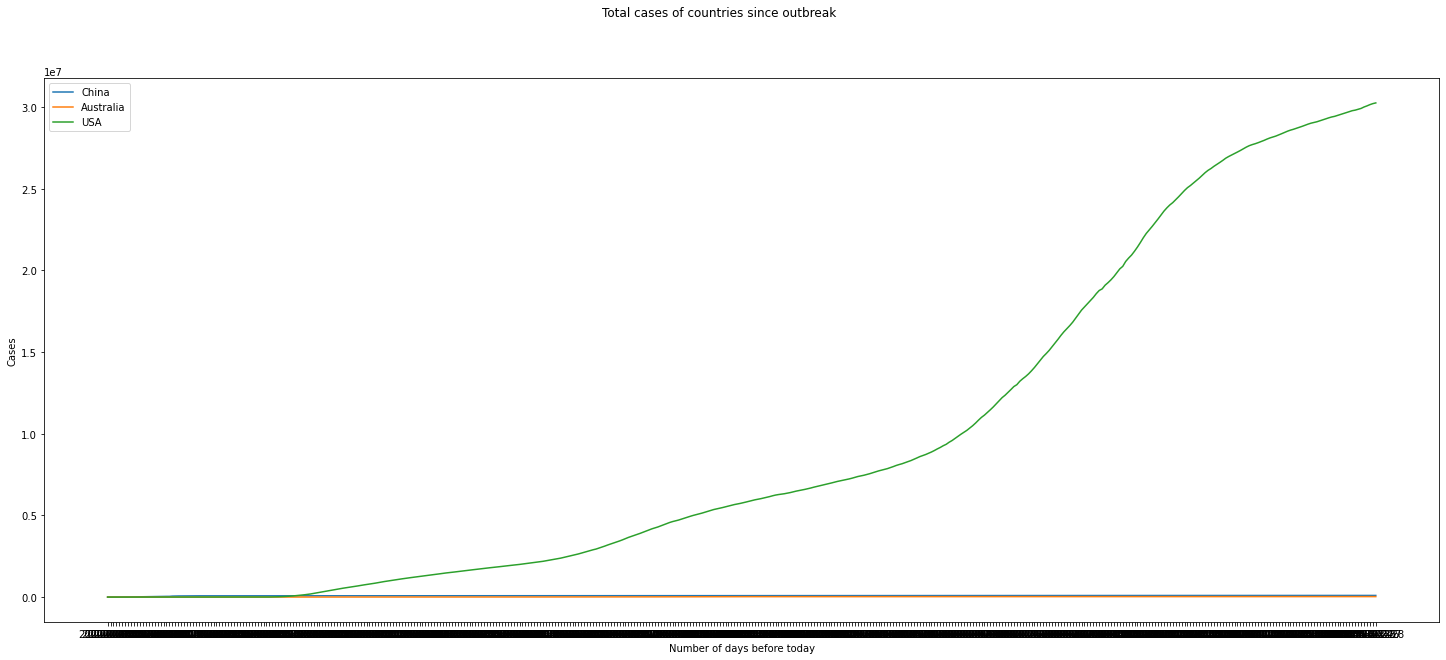

In [133]:
# 3. Plot how **total_cases** for the countries you have picked, grow in time. All three curves 
# have to be on the same plot with the horizontal axis of "Number of days before today". Don't 
# forget the legend. (**4 marks**)
#
# INSERT YOUR CODE HERE
# I have decided to graph the plots up to the end point of 28/03/2021. This is the latest data entry for Australia

dates = []
ausIdx = []
usaIdx = []
chnIdx = []
ausCases = []
usaCases = []
chnCases = []
x = 0
for index, date in enumerate(data_dict['iso_code']):
    if (data_dict['iso_code'][index] == 'CHN'):
        dates.append(data_dict['date'][index])
        if (date == '2021-03-28'):
            dates.append(data_dict['date'][index])
            break
y = 0
for index, coun in enumerate(data_dict['iso_code']):
    if (coun == 'AUS'):
        #Aus did not have data for 4 days where china did so need to adjust the number of values in aus (make added days 0 cases)
        if (y != 4):
            y+=1
            ausIdx.append(y)
            ausCases.append(0)
        ausIdx.append(index)
        ausCases.append(data_dict['total_cases'][index])
    if (coun == 'USA'):
        usaIdx.append(index)
        usaCases.append(data_dict['total_cases'][index])
    if (coun == 'CHN'):
        chnIdx.append(index)
        chnCases.append(data_dict['total_cases'][index])
plt.figure(figsize = (25,10))
plt.plot(dates, chnCases, label='China')
plt.plot(dates, ausCases, label='Australia')
plt.plot(dates, usaCases, label='USA')
plt.legend()
plt.xlabel('Number of days before today')
plt.ylabel('Cases')
plt.suptitle('Total cases of countries since outbreak')
plt.show
#print(dates, len(dates))

In [134]:
# 4. If you have chosen the countries appropriately, you will see that the plot you have produced 
# is not very informative. Why is it so? What can you do to make it more informative and to reveal
# the true dynamics? Note there are **two** reasons, you need to provide both. (**1 mark**)
#
# The graph is obviously not very informative because The US has had a COVID-19 outbreak on an entirely different scale 
# compared to Australia and China. This results in Australia and China's results being impossible to examine.
# The graph is also not very informative because it doesn't show the countries ability to control the pandemic and also
# doesn't clearly show if the outbreak is growing or controlled.
# We can fix this by applying a log scale to the y-axis which will show how well the countries have supressed the outbreak
# and also will show if it is getting worse.


<function matplotlib.pyplot.show(close=None, block=None)>

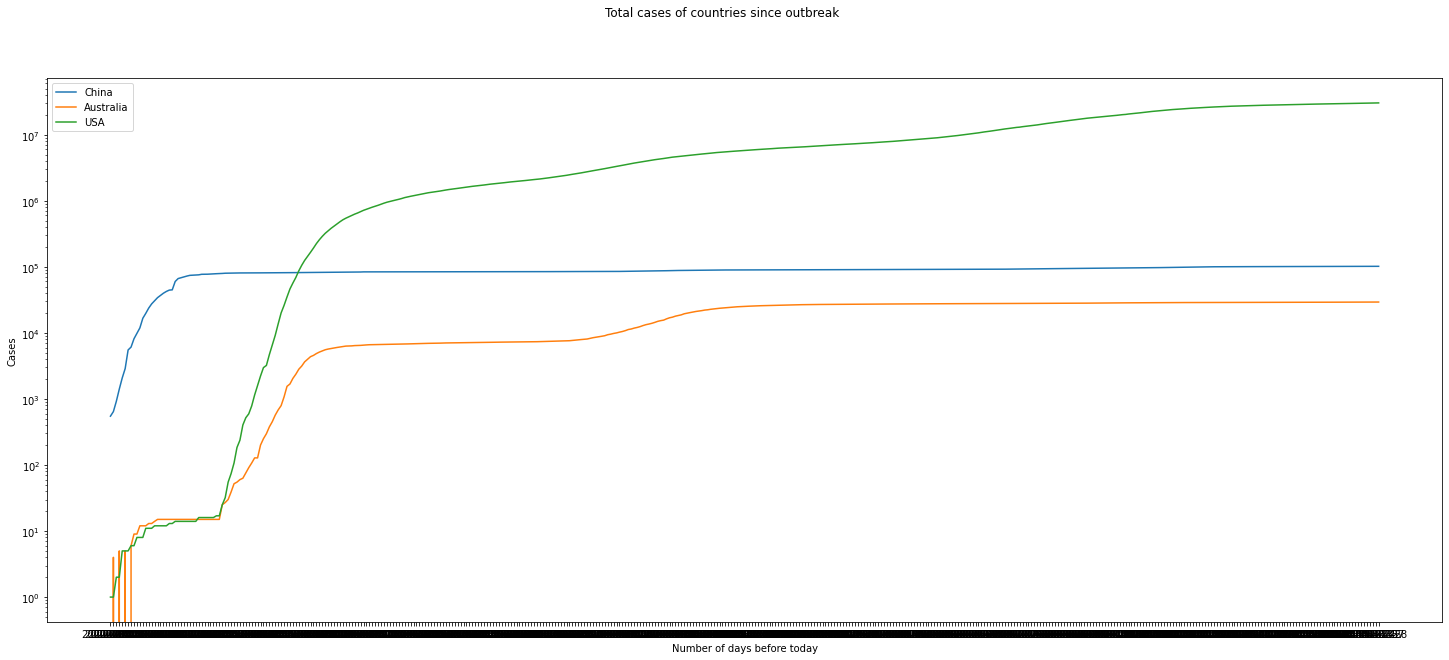

In [135]:
# 5. Implement the idea from Task 4 and make a plot, similar to task 3. (**4 marks**)
#
# INSERT YOUR CODE HERE
# I just have to adjust the yaxis scale and enter the same data
plt.figure(figsize = (25,10))
plt.plot(dates, chnCases, label='China')
plt.plot(dates, ausCases, label='Australia')
plt.plot(dates, usaCases, label='USA')
plt.legend()
plt.xlabel('Number of days before today')
plt.ylabel('Cases')
plt.yscale('log')
plt.suptitle('Total cases of countries since outbreak')
plt.show

#The straight lines indicate exponential growth

In [136]:
# 6. Explain what you see in the new plot. Do you see specific regions of interest in the 
# epidemic curves? Discuss them. (**4 marks**)
#
# INSERT YOUR COMMENT HERE
# The plot shows the success of the countries in controlling the growth rate of covid cases. We can clearly see that every 
# country had an exponetial outbreak before eventually slowing down the growth rate, the cases may be growing but the rate
# at which they grow is not exponential. China has been the most successful given that once it controlled the spread of 
# covid. It has not taken off again. If it did we would see a clear rise in the graph. Australia has been similarly 
# successful but had a second wave after sepressing the first. We can see the orange line is flat for a couple of months 
# before the second wave began and cases rose in Victoria. If is worth noting that Australia's second wave was located in 
# only 1 state compared to the first wave which had covid spreading in much of the country. The US is an example of the 
# worst case scenario with outbreaks failing to be suppressed and we can see slight upticks in the graph. These upticks 
# much larger than they appear because every y-coord is 10 times greater than the one before it. 

---
## **Instruction 6** (D/HD level)
In this part of the assignment, we go back to the current state of affairs with COVID and look deeper into the dependencies between the parameters of the COVID epidemic and population parameters. We get back to the dataset we have created, namely **data_filtered_by_date**. This dataset also contains population parameters, for example, population and population density, median age, GDP per capita, human development index, and so on.

NOTE: If you are curious, you may want to limit the number of countries you plot by some condition (similar to what we did above by limiting countries to ones with population above 1 million. The mark will not be affected if you don't.

1. First of all, let's confirm what we saw before in Instructions 3 and 4, namely, counterintuitvely weak or no dependence of the number of cases and mortality on average population density. You need to plot two scatter plots of total mortality and total case numbers per million on population density. Take logarithm base 10 of the population density. (**2 marks**)
2. Annotate the scatter plots with the iso codes of countries. (**1 mark**)
3. Discuss the results you can see in the scatter plots. (**2 marks**) 
4. Make scatter plots of the mortality and case numbers on GDP per capita. (**2 marks**)
5. Annotate the scatter plots with the iso codes of countries. (**1 mark**)
6. Discuss what you see in these scatter plots. Strange, isn't it? What do you think are the reasons? There can be many. (**2 marks**)
7. Make and annotate scatter plot of median age vs mortality and meadian age vs log10 of gdp per capita. (**1 mark**)
8. Use numpy **polyfit** or **polynomial** function to fit a straight line in the last scatter plot (median age vs gdp per capita. Overplot the line. Note - IT CAN BE HARD! (**2 marks**)
9. Discuss the last scatter plots. (**2 marks**)

[**Total mark: 15**]

<function matplotlib.pyplot.show(close=None, block=None)>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


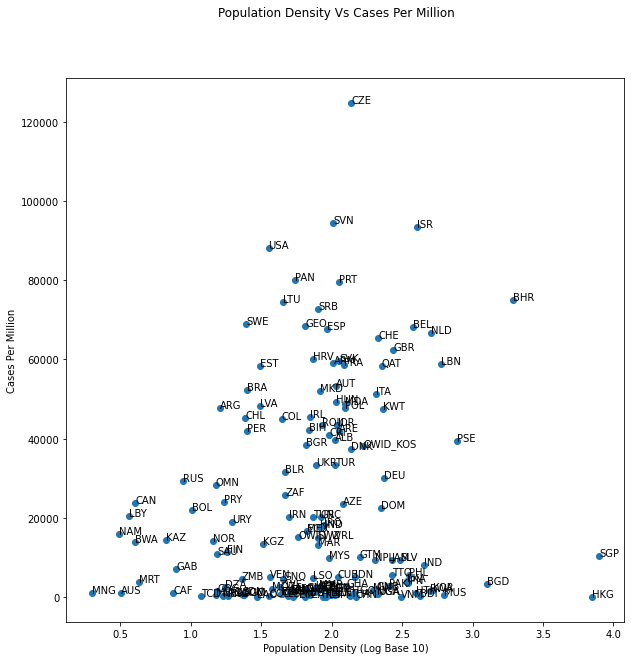

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


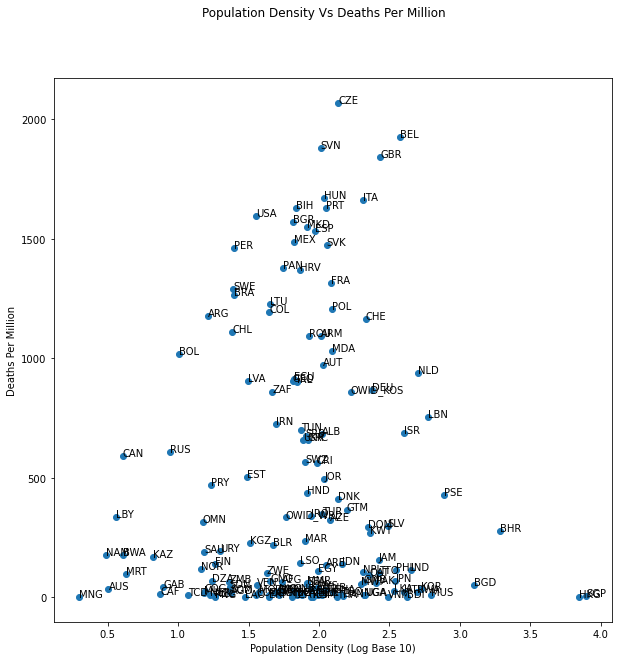

In [145]:
# 1. First of all, let's confirm what we saw before in Instructions 3 and 4, namely, 
# counterintuitvely weak or no dependence of the number of cases and mortality on average 
# population density. You need to plot two scatter plots of total mortality and total 
# case numbers per million on population density. Take logarithm base 10 of the population 
# density. (**2 marks**)
# 2. Annotate the scatter plots with the iso codes of countries. (**1 mark**)

# INSERT YOUR CODE HERE
# I have decided to limit the number of countrys to only countrys with populations of larger than 1 million
import warnings
warnings.filterwarnings('ignore')
popIdx = []
filteredDataDict = {}
filteredDataDict['total_deaths_per_million'] = []
filteredDataDict['total_cases_per_million'] = []
filteredDataDict['population_density'] = []
filteredDataDict['population'] = []
filteredDataDict['iso_code'] = []
filteredDataDict['gdp_per_capita'] = []
filteredDataDict['median_age'] = []
####### CREATING THE DATA DICTIONARY 
for index, pop in enumerate(data_filtered_by_date['population']):
    if (pop > 1000000):
        popIdx.append(index)
x = 0
for index, coun in enumerate(data_filtered_by_date['population']):
    if (index == popIdx[x]):
        x+=1
        for key in filteredDataDict.keys():
            filteredDataDict[key].append(data_filtered_by_date[key][index])
####### PLOTTING THE GRAPHS
plotA = plt.figure(figsize=(10,10))
plotA = plt.scatter(np.log10(filteredDataDict['population_density']), filteredDataDict['total_cases_per_million'], marker = 'o')
plotA = plt.xlabel('Population Density (Log Base 10)')
plotA = plt.ylabel('Cases Per Million')
plotA = plt.suptitle('Population Density Vs Cases Per Million')
for idx, coun in enumerate(filteredDataDict['iso_code']):
    plotA = plt.text(np.log10(filteredDataDict['population_density'][idx]), filteredDataDict['total_cases_per_million'][idx], coun)
plt.show

plotB = plt.figure(figsize=(10,10))
plotB = plt.scatter(np.log10(filteredDataDict['population_density']), filteredDataDict['total_deaths_per_million'], marker = 'o')
plotB = plt.xlabel('Population Density (Log Base 10)')
plotB = plt.ylabel('Deaths Per Million')
plotB = plt.suptitle('Population Density Vs Deaths Per Million')
for idx, coun in enumerate(filteredDataDict['iso_code']):
    plotB = plt.text(np.log10(filteredDataDict['population_density'][idx]), filteredDataDict['total_deaths_per_million'][idx], coun)
plt.show

In [138]:
# 3. Discuss what you see in the scatter plots. (**2 mark**)
#
# INSERT YOUR COMMENT HERE
# Population appears to have weak or no correlation with deaths and cases per million. It is important to plot the graphs
# cases and deaths on a per million scale to have a readable graph. You can then see each countrie's performance adjusted
# for the size of their population. I can determine that there is no correlation because most of the countrys (~80%) sit
# within the band of 1.0 to 3.0 of population density. This means that although the worst outbreaks sit within this band
# it is simply because most countries are in the band and not because of the band itself.

<function matplotlib.pyplot.show(close=None, block=None)>

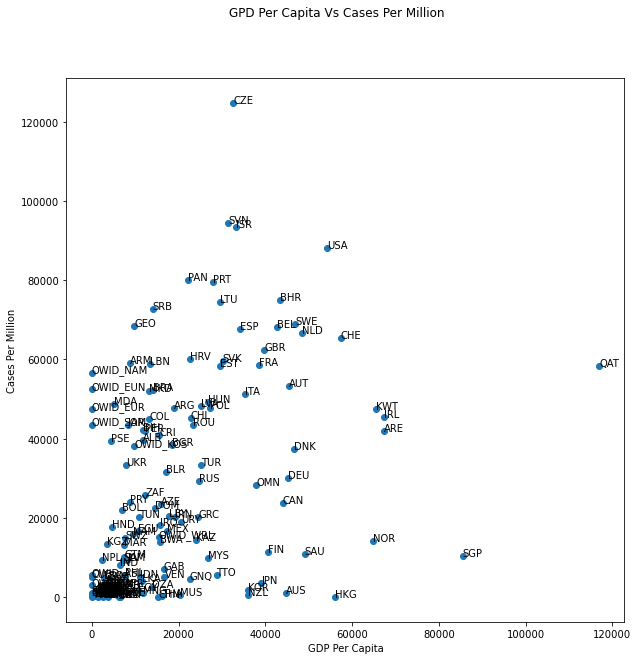

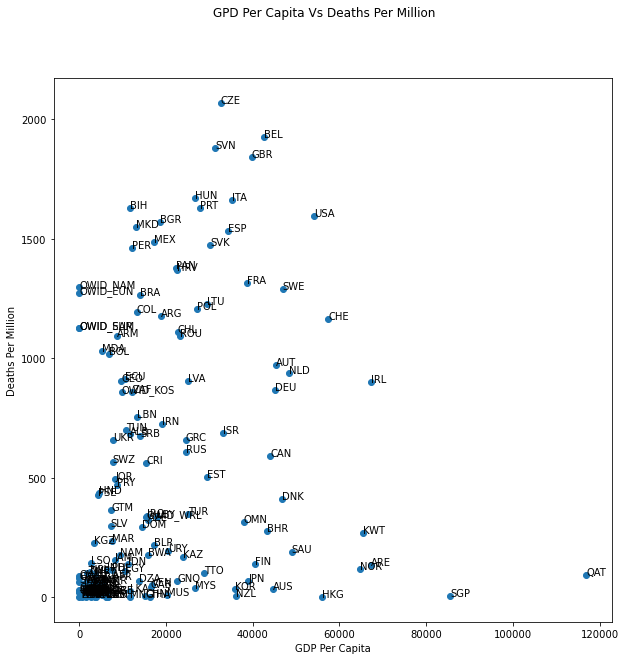

In [139]:
# 4. Make scatter plots of the mortality and case numbers on GDP per capita. (**2 marks**)
# 5. Annotate the scatter plots with the iso codes of countries. (**1 mark**)
# INSERT YOUR CODE HERE
# I am reusing some code from question 2 
plotA = plt.figure(figsize=(10,10))
plotA = plt.scatter(filteredDataDict['gdp_per_capita'], filteredDataDict['total_cases_per_million'], marker = 'o')
plotA = plt.xlabel('GDP Per Capita')
plotA = plt.ylabel('Cases Per Million')
plotA = plt.suptitle('GPD Per Capita Vs Cases Per Million')
for idx, coun in enumerate(filteredDataDict['iso_code']):
    plotA = plt.text(filteredDataDict['gdp_per_capita'][idx], filteredDataDict['total_cases_per_million'][idx], coun)
plt.show

plotB = plt.figure(figsize=(10,10))
plotB = plt.scatter(filteredDataDict['gdp_per_capita'], filteredDataDict['total_deaths_per_million'], marker = 'o')
plotB = plt.xlabel('GDP Per Capita')
plotB = plt.ylabel('Deaths Per Million')
plotB = plt.suptitle('GPD Per Capita Vs Deaths Per Million')
for idx, coun in enumerate(filteredDataDict['iso_code']):
    plotA = plt.text(filteredDataDict['gdp_per_capita'][idx], filteredDataDict['total_deaths_per_million'][idx], coun)
plt.show


In [140]:
# 6. Discuss what you see in these scatter plots. Strange, isn't it? What do you think are 
# the reasons? There can be many. (**2 marks**)
#
# INSERT YOUR COMMENT HERE
# The scatter plots do not represent my intuition. I would expect that on plot 1 (GDP Per Capita Vs Cases Per million) the
# poorer countrys would have lower case loads, and this is somewhat correct. I believe this is because the poorer countries
# have lower rates of testing in comparison to rich countries like Australia that pick up almost all of the cases. I would
# then expect that on plot 2 deaths of those countries would rise considerbly due to undetected cases but this does not 
# occur. Those countries still have very low deaths rates, on par with very succesful countries like Australia. I suspect 
# this is for several reasons. Lower GDP countries have less movement in the country as so the virus is moved around less. 
# Deaths along with Cases are probably under reported. Cases are most likely under reported but deaths are still low 
# becaue the country may have a young population.


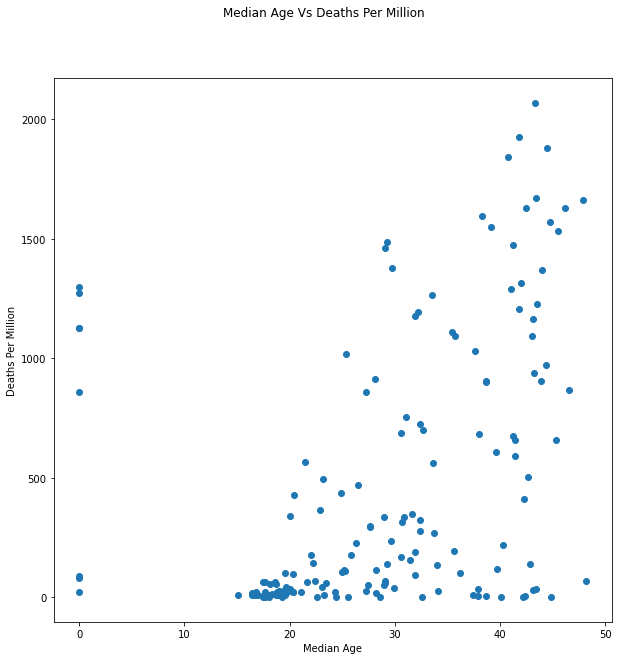

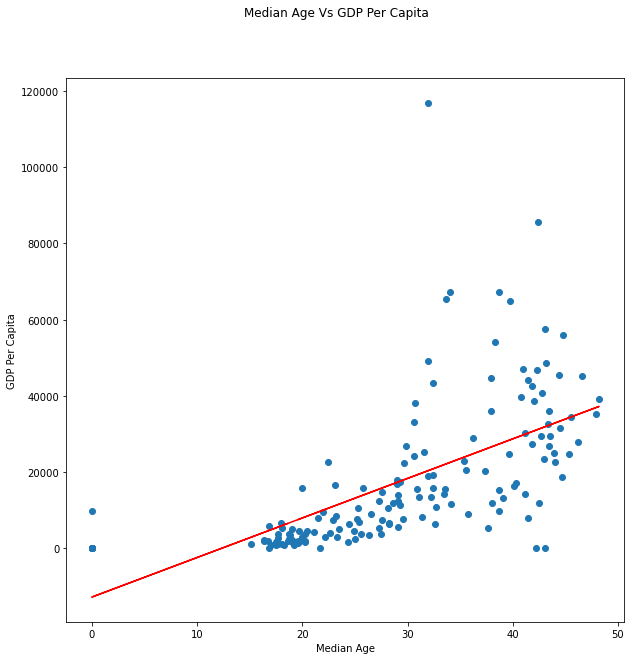

In [177]:
# 7. Make and annotate scatter plot of median age vs mortality and meadian age vs gdp per capita. 
# Use log10 if it makes plot clearer. (**1 mark**)
# INSERT YOUR CODE HERE

plotA = plt.figure(figsize=(10,10))
plotA = plt.scatter(filteredDataDict['median_age'], filteredDataDict['total_deaths_per_million'], marker = 'o')
plotA = plt.xlabel('Median Age')
plotA = plt.ylabel('Deaths Per Million')
plotA = plt.suptitle('Median Age Vs Deaths Per Million')

fitX = np.polyfit(filteredDataDict['median_age'], filteredDataDict['gdp_per_capita'], 1)
coeff = fit[0]
constant = fit[1]
fitY = []
for i in filteredDataDict['median_age']:
    fitY.append(coeff*i + constant)
fig = plt.figure(figsize=(10,10))
ax = fig.subplots()
ax.scatter(filteredDataDict['median_age'], filteredDataDict['gdp_per_capita'], marker = 'o')
ax.plot(filteredDataDict['median_age'], fitY, color='red')
plotB = plt.xlabel('Median Age')
plotB = plt.ylabel('GDP Per Capita')
plotB = plt.suptitle('Median Age Vs GDP Per Capita')

# 8. Use numpy polyfit function to fit a straight line in the last scatter plot (median age vs gdp per 
# capita. Overplot the line. (**2 marks**)
# INSERT YOUR CODE HERE



In [178]:
# 9. Discuss the last scatter plots. (**2 marks**)
#
# INSERT YOUR COMMENT HERE
# We can clearly see that in plot 1 (Deaths Per Million Vs Median Age) that a higher median age correlates to a higher
# death rate. It is positively causative, but obviously other factors are more impactive on mortality such as case numbers.
# We can see the affect of this in plot 1 where the bottom right countries appear to be breaking the rule but this is simply
# because those counrties have not had large covid outbreaks. Your population can't die from covid if they dont contract
# the virus. Plot 1 and 2 look similar and have the same trend because both Mortality and GDP Per Capita are linked to median
# age. Mortality and GDP have no or little affect on each other and this can be seen in Instruction 6 question 4/5.
